In [1]:
import urllib.request
urllib.request.urlretrieve("https://movingai.com/benchmarks/bgmaps/AR0011SR.png","game_map")
from PIL import Image as img
from PIL import ImageOps
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import global_planning as gp
import DWA
%matplotlib inline

{'dt': 0.1, 'V_MAX': 1.2, 'W_MAX': 1.0, 'K_MAX': 0.5, 'MIN_DIST': 1.0, 'ACC_MAX': 0.5, 'W_DOT_MAX': 3.0, 'LATERAL_ACC_MAX': 1.5, 'goal_threshold': 0.05, 'pred_horizon': 10, 'w_cte': 1.0, 'w_speed': 1.0}


In [2]:
#Link for the image= https://movingai.com/benchmarks/bgmaps/AR0011SR.png
#Input the map and convert it into numpy_array
game_img=img.open('game_map')
game_img.thumbnail((100,100))  ##rescale the image to 100x100 pixels
game_img=ImageOps.grayscale(game_img)  ## Convert the image into grayscale
grid=np.array(game_img)/255
dim=grid.shape

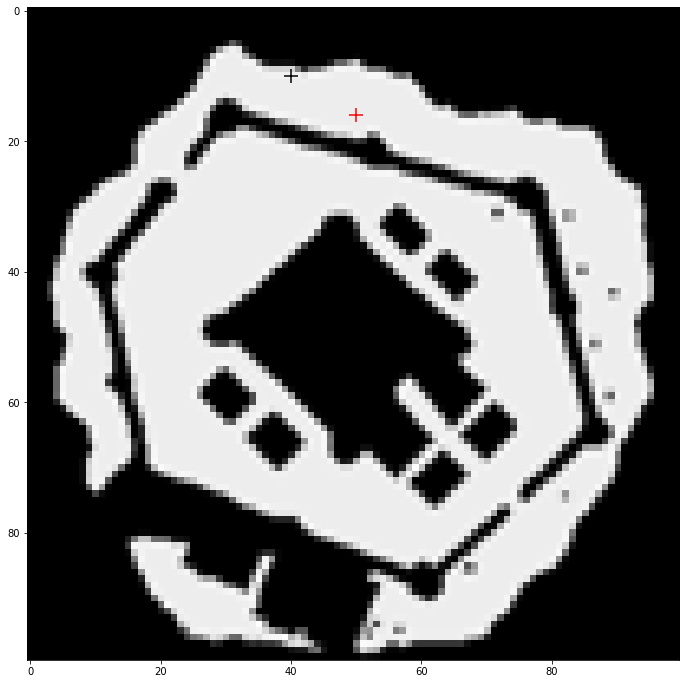

In [20]:
#Visualizing the grid with start and goal pose
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid,plt.cm.binary_r)
start=(10,40)
goal=(16,50)
ax.scatter(start[1],start[0], marker = "+", color = "black", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
plt.show()

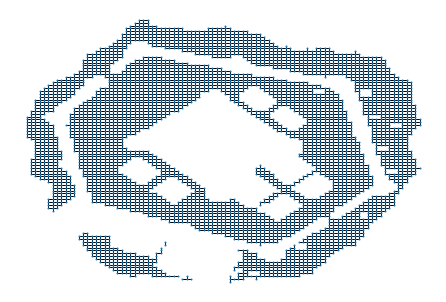

In [21]:
#converting grid into graph and finding the path
threshold=0.7 #greyscale value below which to consider nodes as obstacles and remove them
plan=gp.a_star(grid,threshold) #creates an object for planning the path using a_star
G=plan.graph_from_grid() #converts the grid into graph which a_star can use 
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G,pos=pos,node_size=1)
astar_path=plan.search(start,goal) # a_star uses the graph,start and goal position to find the path which avoides obstacles


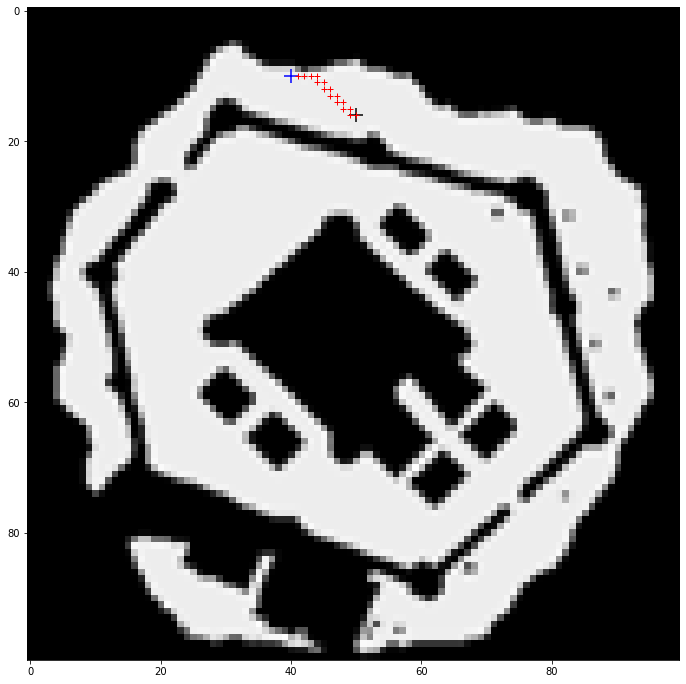

In [22]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid,plt.cm.binary_r)
ax.scatter(start[1],start[0], marker = "+", color = "blue", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "black", s = 200)
for s in astar_path[1:]:
  ax.plot(s[1],s[0],'r+')

In [25]:
start_pose=np.array([start[0],start[1],np.pi/2])
interpolate=1
path=DWA.exec_dwa(start_pose,astar_path,grid,interpolate)
print(path)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
8
9
10
11
12
13
14
15
[[10.0, 40.025, 1.5407963267948965, 0.05, -0.06], [10.001499775010124, 40.07497750168745, 1.5107963267948965, 0.1, -0.06], [10.005997075496083, 40.14984254218259, 1.4807963267948965, 0.15000000000000002, -0.06], [10.014984930415885, 40.24943781548379, 1.4507963267948965, 0.2, -0.06], [10.029948956326999, 40.37353889496552, 1.4207963267948964, 0.25, -0.06], [10.052364676198039, 40.521854556655924, 1.3907963267948964, 0.3, -0.06], [10.083694851547557, 40.69402720289384, 1.3607963267948964, 0.35, -0.06], [10.125386831516778, 40.88963338583867, 1.3307963267948963, 0.39999999999999997, -0.06], [10.178869922462884, 41.108184430180

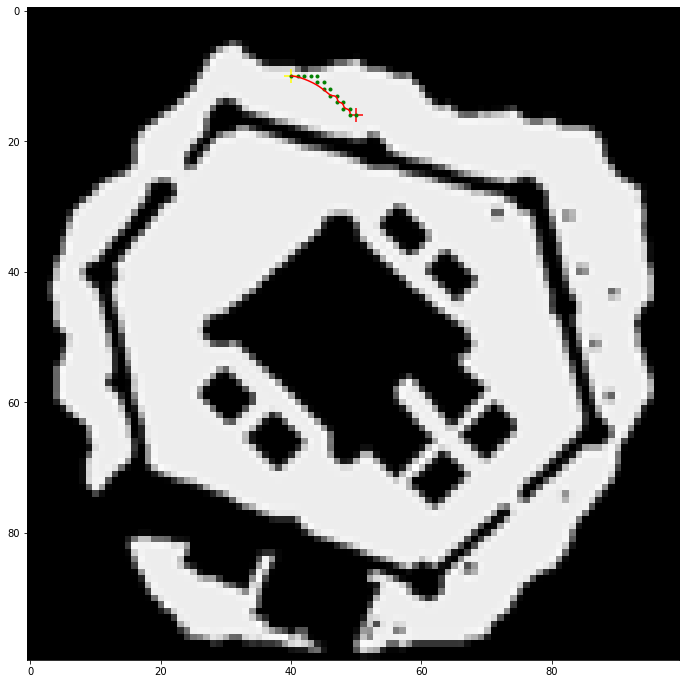

In [26]:
astar_path=np.array(astar_path)
poses = np.array(path)[:,:3]
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.binary_r)
ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
plt.plot(astar_path[:,1], astar_path[:,0], '.', c='g')
plt.plot(poses[:,1], poses[:,0], c='r')

In [28]:
obstacles = np.array([15, 16, 48,50])  #xmin,xmax,ymin,ymax
print(grid[15:16,48:50]) 
for i in range(obstacles[0],obstacles[1]):
  for j in range(obstacles[2],obstacles[3]):
    grid[i,j]=0
print(grid[15:16,48:50]) 



[[0. 0.]]
[[0. 0.]]


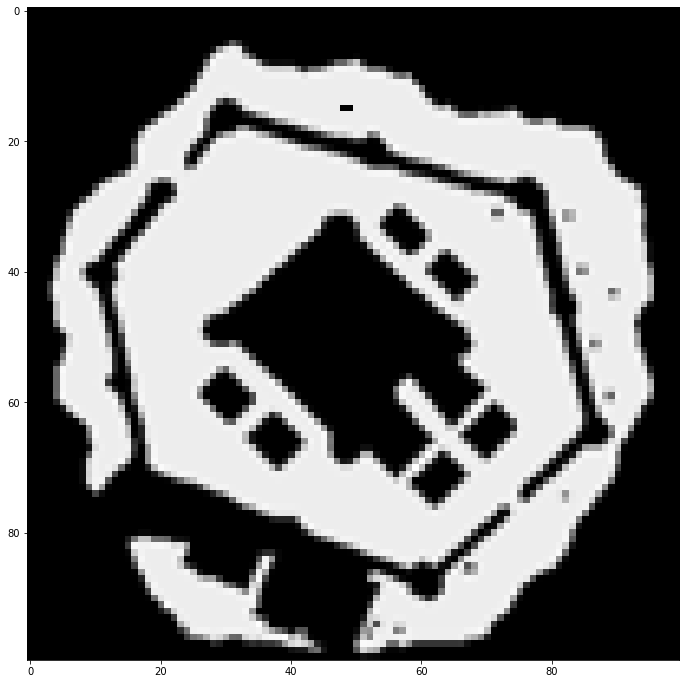

In [29]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.binary_r)

In [30]:
start_pose=np.array([start[0],start[1],0])
interpolate=1
path=DWA.exec_dwa(start_pose,astar_path,grid,interpolate)
print(path)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


TypeError: ignored

In [ ]:
astar_path=np.array(astar_path)
poses = np.array(path)[:,:3]
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.binary_r)
ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
plt.plot(astar_path[:,1], astar_path[:,0], '.', c='g')
plt.plot(poses[:,1], poses[:,0], c='r')